In [2]:
import json
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# File path
file_path = "./evaluate_best_model/evaluation_log.json"

# Check if file exists
if not os.path.exists(file_path):
    raise FileNotFoundError(f"The file {file_path} does not exist.")

# Load the JSON data
with open(file_path, 'r') as file:
    data = json.load(file)


In [3]:
# Extract data
confusion_matrix = np.array(data["confusion_matrix"])
normalized_confusion_matrix = np.array(data["normalized_confusion_matrix"])
classification_report = data["classification_report"]
accuracy = data["accuracy"]
per_class_accuracy = data["per_class_accuracy"]
misclassified_samples = data["misclassified_samples"]

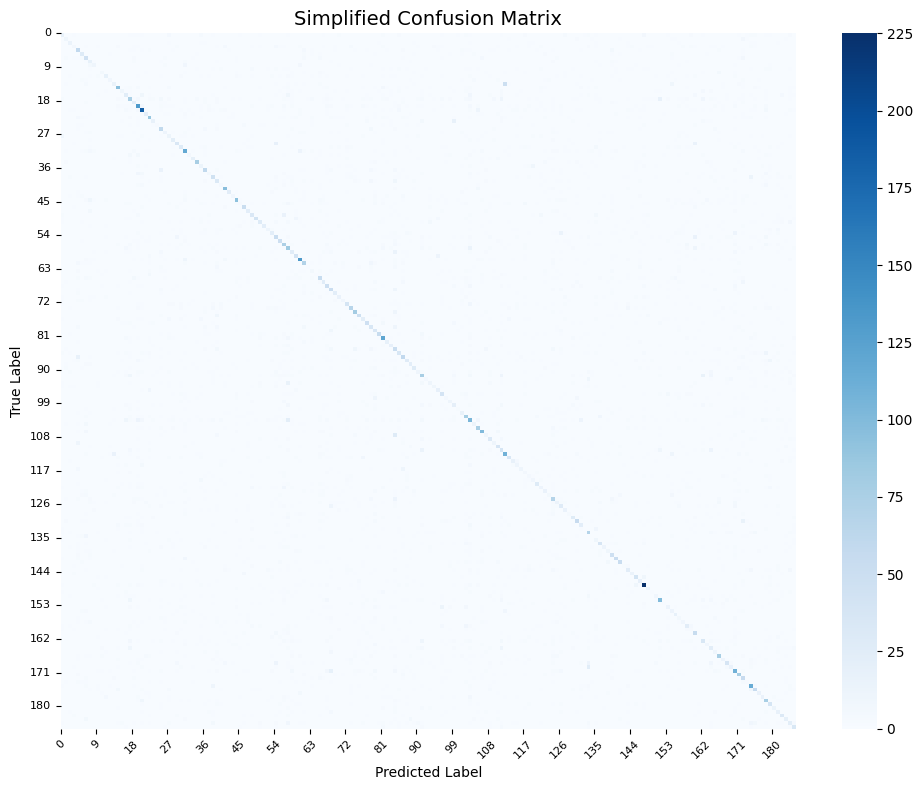

In [6]:
# Simplified Confusion Matrix Visualization
plt.figure(figsize=(10, 8))  # Increase figure size for better readability
sns.heatmap(confusion_matrix, annot=False, cmap='Blues', cbar=True)

# Show fewer labels on axes (every 10th label, for example)
num_classes = confusion_matrix.shape[0]
ticks = range(0, num_classes, max(1, num_classes // 20))  # Adjust frequency based on matrix size
plt.xticks(ticks, ticks, rotation=45, fontsize=8)  # Smaller font size for clarity
plt.yticks(ticks, ticks, fontsize=8)

plt.title("Simplified Confusion Matrix", fontsize=14)
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.tight_layout()
plt.show()


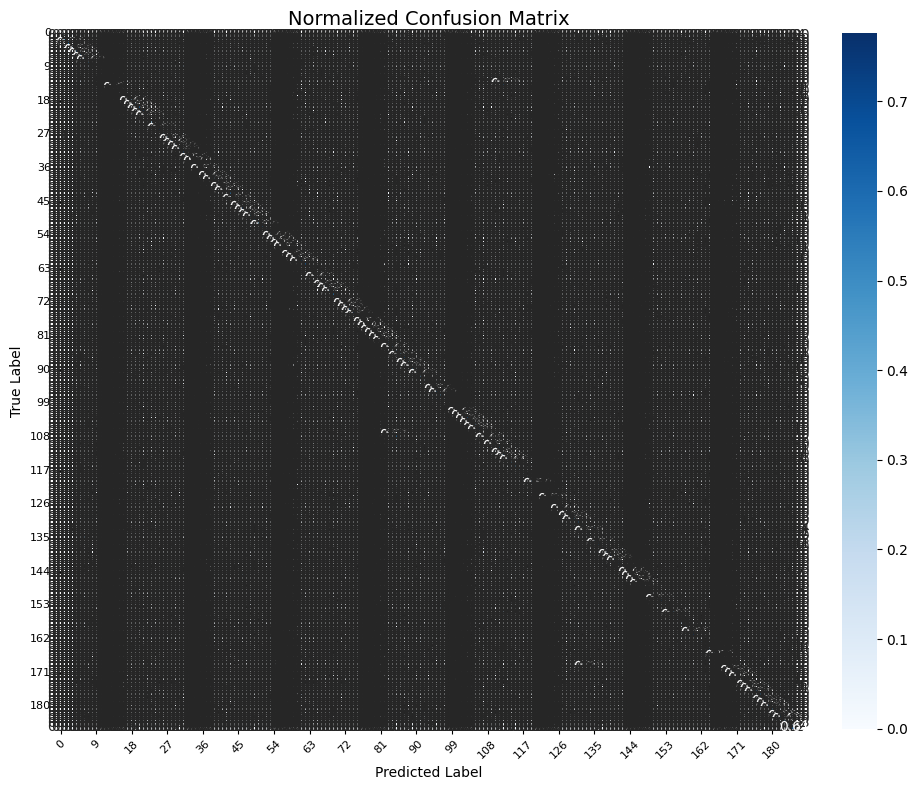

In [10]:
plt.figure(figsize=(10, 8))  # Increase figure size for better readability
sns.heatmap(normalized_confusion_matrix, annot=False, cmap='Blues', cbar=True)

# Show fewer labels on axes (every 10th label, for example)
num_classes = confusion_matrix.shape[0]
ticks = range(0, num_classes, max(1, num_classes // 20))  # Adjust frequency based on matrix size
plt.xticks(ticks, ticks, rotation=45, fontsize=8)  # Smaller font size for clarity
plt.yticks(ticks, ticks, fontsize=8)

plt.title("Normalized Confusion Matrix", fontsize=14)
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.tight_layout()
plt.show()


<Figure size 1200x600 with 0 Axes>

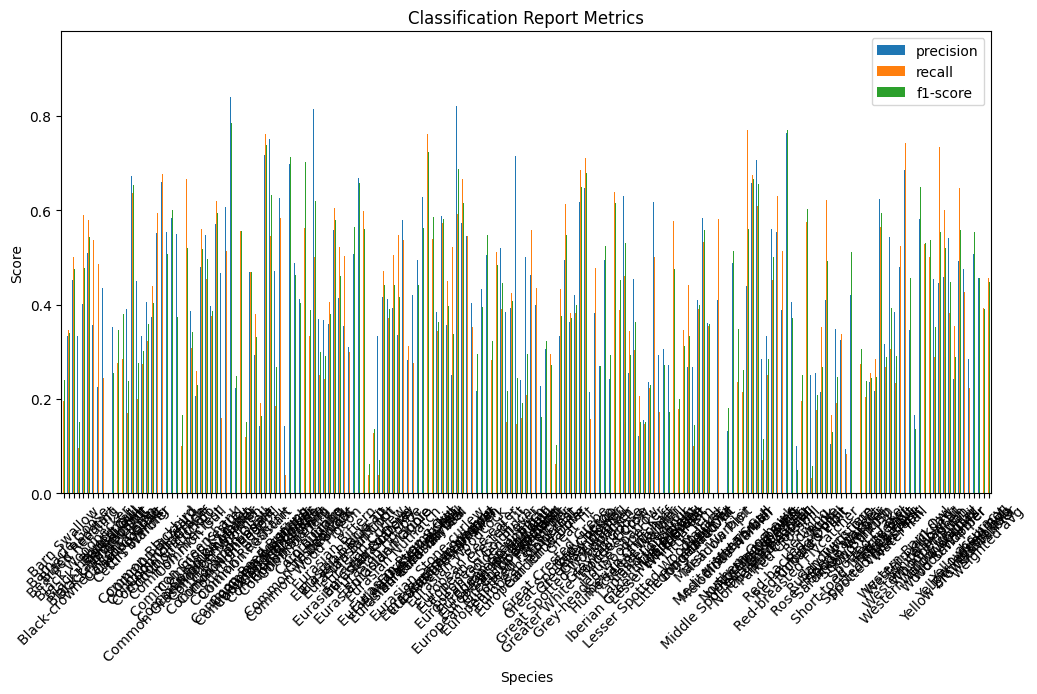

In [9]:

# Visualization 3: Classification Report Metrics
df_report = pd.DataFrame(classification_report).T[['precision', 'recall', 'f1-score']]
plt.figure(figsize=(12, 6))
df_report.plot(kind='bar', figsize=(12, 6))
plt.title("Classification Report Metrics")
plt.ylabel("Score")
plt.xlabel("Species")
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.show()


In [ ]:
# Visualization 4: Per-Class Accuracy
plt.figure(figsize=(12, 6))
plt.bar(per_class_accuracy.keys(), per_class_accuracy.values())
plt.title("Per-Class Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Species")
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Visualization 5: Misclassified Samples Heatmap
misclassifications = Counter((sample['true_label'], sample['predicted_label']) for sample in misclassified_samples)
df_misclassifications = pd.DataFrame.from_dict(misclassifications, orient='index', columns=['count']).reset_index()
df_misclassifications.columns = ['true_label', 'predicted_label', 'count']
heatmap_data = df_misclassifications.pivot("true_label", "predicted_label", "count").fillna(0)
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt='.0f', cmap='Reds')
plt.title("Misclassified Samples Heatmap")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()


In [ ]:
# Visualization 6: Accuracy Trends (if multiple runs available, example below assumes single accuracy)
plt.figure(figsize=(10, 6))
plt.bar(["Overall Accuracy"], [accuracy])
plt.title("Overall Accuracy")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.show()